In [1]:
from d2l import torch as d2l
import math
import torch
import numpy as np
import time
import random

In [2]:
def synthetic_data(w, b, n_examples):
    X = torch.normal(0, 1, (n_examples, len(w)))
    y = torch.matmul(X, w) + b;
    y += torch.normal(0, 0.01, y.shape)
    
    return X, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
n_examples = 1000
X, y = synthetic_data(true_w, true_b, n_examples)

In [4]:
X.shape

torch.Size([1000, 2])

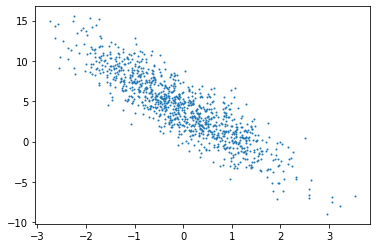

In [5]:
d2l.plt.scatter(d2l.numpy(X)[:, 1], d2l.numpy(y), 1)

In [6]:
def data_iter(batch_size, X, y):
    n_examples = len(y)
    indicies = list(range(n_examples))
    
    random.shuffle(indicies)
    
    for i in range(0, n_examples, batch_size):
        batch_indices = torch.tensor(indicies[
            i:min(i + batch_size, n_examples)
        ])
        yield X[batch_indices], y[batch_indices]

In [7]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [8]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [9]:
def square_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [10]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

In [ ]:
lr = 0.03
epochs = 3
batch_size = 10
net = linreg
loss = square_loss

for epoch in range(epochs):
    for X_b, y_b in data_iter(batch_size, X, y):
        l = loss(net(X_b, w, b), y_b)
        l.sum().backward()
        
        sgd([w, b], lr, batch_size)
        
    with torch.no_grad():
        train_l = loss(net(X, w, b), y)
        print(f'epoch {epoch + 1}, loss: {float(train_l.mean()):f}' )
        